In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
def f(x):
  return 3*x**3 -4*x**2 +5*x -5

In [3]:
f(10.0)

2645.0

In [6]:
xs=np.arange(-10,20,1)
ys=f(xs)
xs
ys

array([-3455, -2561, -1837, -1265,  -827,  -505,  -281,  -137,   -55,
         -17,    -5,    -1,    13,    55,   143,   295,   529,   863,
        1315,  1903,  2645,  3559,  4663,  5975,  7513,  9295, 11339,
       13663, 16285, 19223])

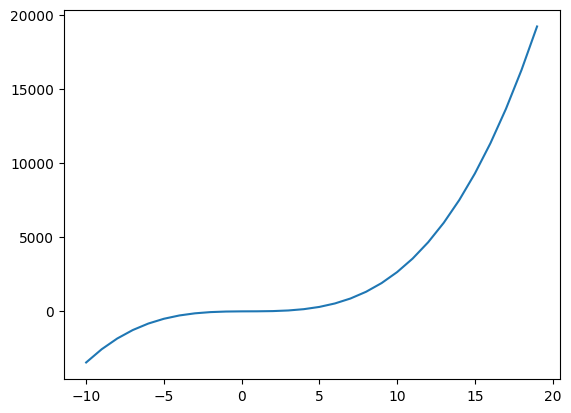

In [7]:

plt.plot(xs,ys)


In [12]:
h=0.0000000001
x=10.0

(f(x+h)-f(x))/h

825.0026439782232

In [50]:
class Value:
  def __init__(self,data, _children=(), _op='',label=''):
    self.data= data
    self._prev= set(_children)
    self._op=_op
    self.grad=0.0
    self.label=label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self,other):
    out=Value(self.data+other.data,(self,other),'+')
    return out


  def __mul__(self,other):
    out=Value(self.data * other.data,(self,other),'*')
    return out

  def tanh(self):  #activation function
    x=self.data
    t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out=Value(t, (self, ), 'tanh')
    return out

a=Value(2.0,label='a')
b=Value(3.0,label='b')
c=Value(10.0,label='c')
e=a+b
e.label='e'
d=e+c
d.label='d'
f=Value(2.0,label='f')
L=d+f
L.label='L'

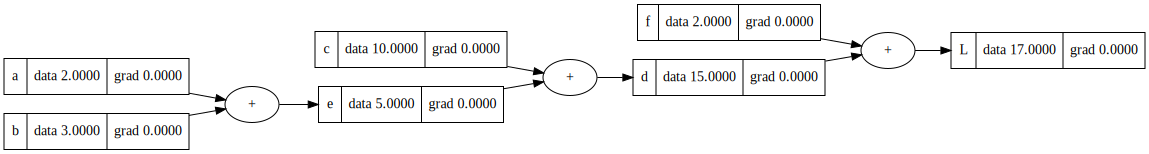

In [47]:

from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{%s | data %.4f | grad %.4f }" % (n.label,n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

draw_dot(L)

In [ ]:
#manual backprop neuron method

#inputs x1,x2

x1= Value(4.0,label='x1')
x2=Value(5.0,label='x2')

#weights

w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')

b= Value(6.9,label='b')

x1w1=x1*w1
x1w1.label='x1w1'

x2w2=x2*w2
x2w2.label='x2w2'

x1w1x2w2=x1w1+x2w2
x1w1x2w2.label='x1w1+x2w2'

n=x1w1x2w2 +b
n.label='n'
o=n.tanh()
o.label='o'


In [66]:
#calculating gradients of all nodes wrt to output o

o.grad=1.0

#o= tanh(n)
# do/dn = 1-(tanh(n))**2 = 1-o**2


In [63]:
1-o.data**2


0.9900662908474398

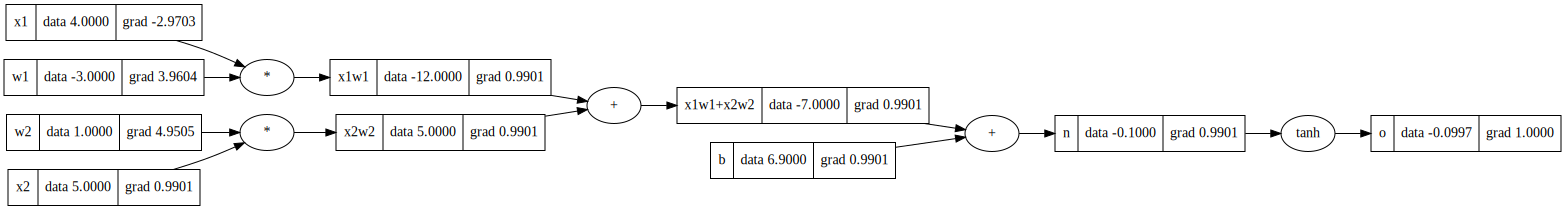

In [72]:
n.grad=0.990066
x1w1x2w2.grad=0.990066  # local derivative over plus operation acts as distributor over the nodes, in our case the child nodes multiply with 1 to give same gradient as n.grad
b.grad=0.990066

x1w1.grad=0.9901
x2w2.grad=0.9901

x2.grad= w2.data*x2w2.grad
w2.grad=x2.data*x2w2.grad

x1.grad=w1.data*x1w1.grad
w1.grad=x1.data*x1w1.grad

draw_dot(o)